In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [2]:
directory = os.path.abspath("") + '/dataset/ethereum/'
data = pd.read_csv(directory + 'data.csv', on_bad_lines = 'skip')
ECDSA = data.copy()

In [3]:
# Drop blocks with no transactions
ECDSA = ECDSA[ECDSA['TotalTx'] != 0]

# Average block size in bytes
ECDSA['BlockSize'] = ECDSA['BlockSize']

ECDSA['AvgTxSize'] = ECDSA['BlockSize'] / ECDSA['TotalTx']

ECDSA['Date'] = ECDSA['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x))

ECDSA['FeePerBlock'] = ECDSA['GasUsed'] * ECDSA['BaseFeePerGas']

ECDSA['AvgTxGas'] = ECDSA['GasUsed'] / ECDSA['TotalTx']

# ECDSA['AvgFeePerTx'] = ECDSA['FeePerBlock'] / ECDSA['TotalTx']
ECDSA['AvgFeePerTx'] = ECDSA['AvgTxGas'] * ECDSA['BaseFeePerGas']

# Max No of Transactions possible in a 30 million gas limit
ECDSA['NoMaxTxPossible'] = 30000000 / ECDSA['AvgTxGas'].min()

ECDSA['AverageTPS'] = (ECDSA['BlockSize'] / ECDSA['AvgTxSize']) / ECDSA['BlockTime']

ECDSA.describe()

C:\Users\ummar\AppData\Local\Temp\ipykernel_15564\4142499019.py:9: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  ECDSA['Date'] = ECDSA['Timestamp'].apply(lambda x: datetime.utcfromtimestamp(x))


,BlockNumber,Timestamp,BlockReward,BlockSize,TotalTx,GasUsed,GasAvgPrice,BlockTime,BaseFeePerGas,AvgTxSize,Date,FeePerBlock,AvgTxGas,AvgFeePerTx,NoMaxTxPossible,AverageTPS
count,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2693665,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06
mean,1.780538e+07,1.690694e+09,8.210744e-02,1.401196e+05,1.488773e+02,1.512352e+07,3.341400e-08,1.212839e+01,2.797172e-08,9.882402e+02,2023-07-30 05:13:25.797916672,4.197992e-01,1.075130e+05,2.896514e-03,1.428571e+03,1.229603e+01
min,1.645497e+07,1.674302e+09,0.000000e+00,6.330000e+02,1.000000e+00,2.100000e+04,4.724384e-09,1.200000e+01,3.996741e-09,1.123049e+02,2023-01-21 11:46:35,2.257098e-04,2.100000e+04,1.114531e-04,1.428571e+03,2.083333e-02
25%,1.713023e+07,1.682510e+09,2.459373e-02,6.214800e+04,1.200000e+02,1.162459e+07,1.803205e-08,1.200000e+01,1.493489e-08,4.338442e+02,2023-04-26 11:54:23,2.044320e-01,8.507866e+04,1.495036e-03,1.428571e+03,9.916667e+00
50%,1.780544e+07,1.690715e+09,4.236888e-02,1.026750e+05,1.400000e+02,1.399854e+07,2.628430e-08,1.200000e+01,2.220459e-08,6.862766e+02,2023-07-30 11:04:47,3.244982e-01,9.736411e+04,2.249297e-03,1.428571e+03,1.158333e+01
75%,1.848048e+07,1.698881e+09,7.913076e-02,1.774110e+05,1.640000e+02,1.731431e+07,3.973690e-08,1.200000e+01,3.396361e-08,1.249131e+03,2023-11-01 23:16:47,5.114681e-01,1.140849e+05,3.451044e-03,1.428571e+03,1.358333e+01
max,1.915573e+07,1.707059e+09,1.822103e+02,2.333167e+06,1.366000e+03,3.002708e+07,9.472830e-06,9.600000e+01,8.132266e-07,6.538800e+04,2024-02-04 15:06:23,1.653241e+01,3.000000e+07,9.239259e-01,1.428571e+03,1.138333e+02
std,7.796217e+05,9.457689e+06,3.078260e-01,1.227419e+05,5.691164e+01,5.336105e+06,3.027426e-08,1.255729e+00,2.224686e-08,9.273483e+02,NaN,3.712858e-01,9.051606e+04,2.876701e-03,5.229596e-12,4.632969e+00


Text(0.5, 1.0, 'Ethereum correlation between features')

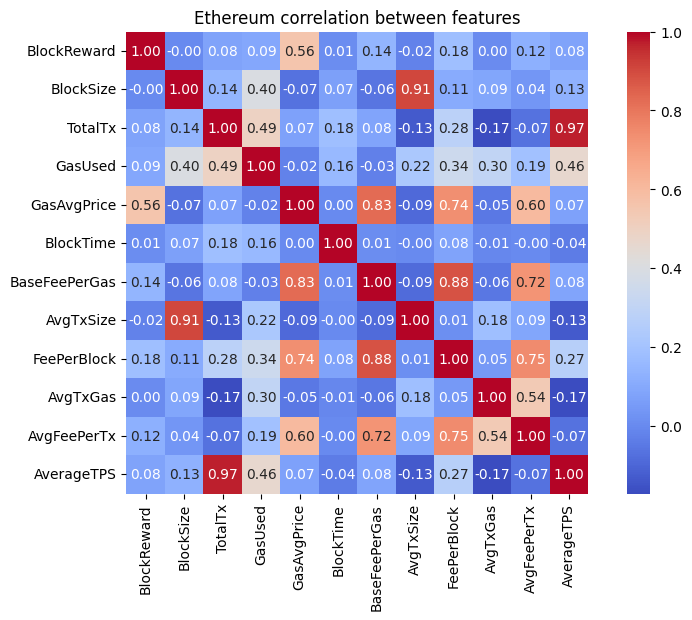

In [4]:
ECDSA_CORR = ECDSA.copy().drop(labels=['BlockNumber', 'Timestamp', 'Date', 'NoMaxTxPossible'], axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(ECDSA_CORR, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           cmap= 'coolwarm')
plt.title('Ethereum correlation between features')

In [5]:
def getPQAvgTransactionSize(ECDSATxSize, PQ_SIG_SIZE: int):
    
    # ECDSA (bytes)
    ECDSA_SIG_SIZE = 65

    PQ_TxSize = ECDSATxSize - ECDSA_SIG_SIZE + PQ_SIG_SIZE

    return PQ_TxSize

In [6]:
FALCON_512_SIG_SIZE = 666 # (bytes)

FALCON = pd.DataFrame()

FALCON['AvgTxSize'] = getPQAvgTransactionSize(ECDSA['AvgTxSize'], FALCON_512_SIG_SIZE)

FALCON['Date'] = ECDSA['Date']

# Since a basic transaction requires 21000 units of Gas (minimum), we can use it as a reference
FALCON['AvgTxGas'] = (21000 * FALCON['AvgTxSize']) / ECDSA['AvgTxSize'].min()

FALCON['AvgFeePerTx'] = FALCON['AvgTxGas'] * ECDSA['BaseFeePerGas']

Ts = ECDSA['TotalTx'].mean() / (176.55 / (FALCON['AvgTxSize'].mean() / 50))

Tv = ECDSA['TotalTx'].mean() / (17234 / (FALCON['AvgTxSize'].mean() / 50))

FALCON['Power'] = 210 * (86400 / ECDSA['BlockTime'].mean()).__floor__() * (Ts + Tv)

FALCON['Power'] = FALCON['Power'] / 3.6e6

# Max No of Transactions possible in a 30 million gas limit
FALCON['NoMaxTxPossible'] = 30000000 / FALCON['AvgTxGas'].min()

FALCON.describe()

,AvgTxSize,Date,AvgTxGas,AvgFeePerTx,Power,NoMaxTxPossible
count,2.693665e+06,2693665,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06
mean,1.589240e+03,2023-07-30 05:13:25.797916672,2.971736e+05,7.976107e-03,1.125088e+01,2.249186e+02
min,7.133049e+02,2023-01-21 11:46:35,1.333816e+05,6.048295e-04,1.125088e+01,2.249186e+02
25%,1.034844e+03,2023-04-26 11:54:23,1.935066e+05,3.815567e-03,1.125088e+01,2.249186e+02
50%,1.287277e+03,2023-07-30 11:04:47,2.407092e+05,5.941339e-03,1.125088e+01,2.249186e+02
75%,1.850131e+03,2023-11-01 23:16:47,3.459578e+05,9.372147e-03,1.125088e+01,2.249186e+02
max,6.598900e+04,2024-02-04 15:06:23,1.233935e+07,8.294889e-01,1.125088e+01,2.249186e+02
std,9.273483e+02,NaN,1.734058e+05,8.100115e-03,2.309264e-14,1.705303e-13


In [7]:
DILITHIUM_SIG_SIZE = 2420 # (bytes)

DILITHIUM = pd.DataFrame()

DILITHIUM['AvgTxSize'] = getPQAvgTransactionSize(ECDSA['AvgTxSize'], DILITHIUM_SIG_SIZE)

DILITHIUM['Date'] = ECDSA['Date']

# Since a basic transaction requires 21000 units of Gas (minimum), we can use it as a reference
DILITHIUM['AvgTxGas'] = (21000 * DILITHIUM['AvgTxSize']) / ECDSA['AvgTxSize'].min()

DILITHIUM['AvgFeePerTx'] = DILITHIUM['AvgTxGas'] * ECDSA['BaseFeePerGas']

Ts = ECDSA['TotalTx'].mean() / (2125 / (DILITHIUM['AvgTxSize'].mean() / 50))

Tv = ECDSA['TotalTx'].mean() / (8826 / (DILITHIUM['AvgTxSize'].mean() / 50))

DILITHIUM['Power'] = 210 * (86400 / ECDSA['BlockTime'].mean()).__floor__() * (Ts + Tv)

DILITHIUM['Power'] = DILITHIUM['Power'] / 3.6e6

# Max No of Transactions possible in a 30 million gas limit
DILITHIUM['NoMaxTxPossible'] = 30000000 / DILITHIUM['AvgTxGas'].min()

DILITHIUM.describe()

,AvgTxSize,Date,AvgTxGas,AvgFeePerTx,Power,NoMaxTxPossible
count,2.693665e+06,2693665,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06
mean,3.343240e+03,2023-07-30 05:13:25.797916672,6.251559e+05,1.715033e-02,2.415109e+00,6.502460e+01
min,2.467305e+03,2023-01-21 11:46:35,4.613638e+05,1.964075e-03,2.415109e+00,6.502460e+01
25%,2.788844e+03,2023-04-26 11:54:23,5.214888e+05,9.046812e-03,2.415109e+00,6.502460e+01
50%,3.041277e+03,2023-07-30 11:04:47,5.686914e+05,1.347503e-02,2.415109e+00,6.502460e+01
75%,3.604131e+03,2023-11-01 23:16:47,6.739401e+05,2.063093e-02,2.415109e+00,6.502460e+01
max,6.774300e+04,2024-02-04 15:06:23,1.266733e+07,8.744964e-01,2.415109e+00,6.502460e+01
std,9.273483e+02,NaN,1.734058e+05,1.410165e-02,1.376677e-14,2.131629e-13


In [8]:
SPHINCS_SIG_SIZE = 17088 # (bytes)

SPHINCS = pd.DataFrame()

SPHINCS['AvgTxSize'] = getPQAvgTransactionSize(ECDSA['AvgTxSize'], SPHINCS_SIG_SIZE)

SPHINCS['Date'] = ECDSA['Date']

# Since a basic transaction requires 21000 units of Gas (minimum), we can use it as a reference
SPHINCS['AvgTxGas'] = (21000 * SPHINCS['AvgTxSize']) / ECDSA['AvgTxSize'].min()

SPHINCS['AvgFeePerTx'] = SPHINCS['AvgTxGas'] * ECDSA['BaseFeePerGas']

Ts = ECDSA['TotalTx'].mean() / (23.84 / (SPHINCS['AvgTxSize'].mean() / 50))

Tv = ECDSA['TotalTx'].mean() / (402.53 / (SPHINCS['AvgTxSize'].mean() / 50))

SPHINCS['Power'] = 210 * (86400 / ECDSA['BlockTime'].mean()).__floor__() * (Ts + Tv)

SPHINCS['Power'] = SPHINCS['Power'] / 3.6e6

# Max No of Transactions possible in a 30 million gas limit
SPHINCS['NoMaxTxPossible'] = 30000000 / SPHINCS['AvgTxGas'].min()

SPHINCS.describe()

,AvgTxSize,Date,AvgTxGas,AvgFeePerTx,Power,NoMaxTxPossible
count,2.693665e+06,2693665,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06
mean,1.801124e+04,2023-07-30 05:13:25.797916672,3.367940e+06,9.387072e-02,9.900657e+02,9.362863e+00
min,1.713530e+04,2023-01-21 11:46:35,3.204148e+06,1.328309e-02,9.900657e+02,9.362863e+00
25%,1.745684e+04,2023-04-26 11:54:23,3.264273e+06,5.023926e-02,9.900657e+02,9.362863e+00
50%,1.770928e+04,2023-07-30 11:04:47,3.311476e+06,7.459942e-02,9.900657e+02,9.362863e+00
75%,1.827213e+04,2023-11-01 23:16:47,3.416724e+06,1.140082e-01,9.900657e+02,9.362863e+00
max,8.241100e+04,2024-02-04 15:06:23,1.541012e+07,2.676506e+00,9.900657e+02,9.362863e+00
std,9.273483e+02,NaN,1.734058e+05,7.403776e-02,1.023182e-12,4.618529e-14


#### AVERAGE TRANSACTIONS PER SECOND

> Average TPS = (Average Block Size / Average Transaction Size) / Average Block Time

In [9]:
FALCON['AverageTPS'] = (ECDSA['BlockSize'] / FALCON['AvgTxSize']) / ECDSA['BlockTime']
DILITHIUM['AverageTPS'] = (ECDSA['BlockSize'] / DILITHIUM['AvgTxSize']) / ECDSA['BlockTime']
SPHINCS['AverageTPS'] = (ECDSA['BlockSize'] / SPHINCS['AvgTxSize']) / ECDSA['BlockTime']

In [10]:
SPHINCS.describe()

,AvgTxSize,Date,AvgTxGas,AvgFeePerTx,Power,NoMaxTxPossible,AverageTPS
count,2.693665e+06,2693665,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06
mean,1.801124e+04,2023-07-30 05:13:25.797916672,3.367940e+06,9.387072e-02,9.900657e+02,9.362863e+00,6.218504e-01
min,1.713530e+04,2023-01-21 11:46:35,3.204148e+06,1.328309e-02,9.900657e+02,9.362863e+00,2.504436e-03
25%,1.745684e+04,2023-04-26 11:54:23,3.264273e+06,5.023926e-02,9.900657e+02,9.362863e+00,2.951087e-01
50%,1.770928e+04,2023-07-30 11:04:47,3.311476e+06,7.459942e-02,9.900657e+02,9.362863e+00,4.777191e-01
75%,1.827213e+04,2023-11-01 23:16:47,3.416724e+06,1.140082e-01,9.900657e+02,9.362863e+00,8.051803e-01
max,8.241100e+04,2024-02-04 15:06:23,1.541012e+07,2.676506e+00,9.900657e+02,9.362863e+00,6.836006e+00
std,9.273483e+02,NaN,1.734058e+05,7.403776e-02,1.023182e-12,4.618529e-14,4.710287e-01


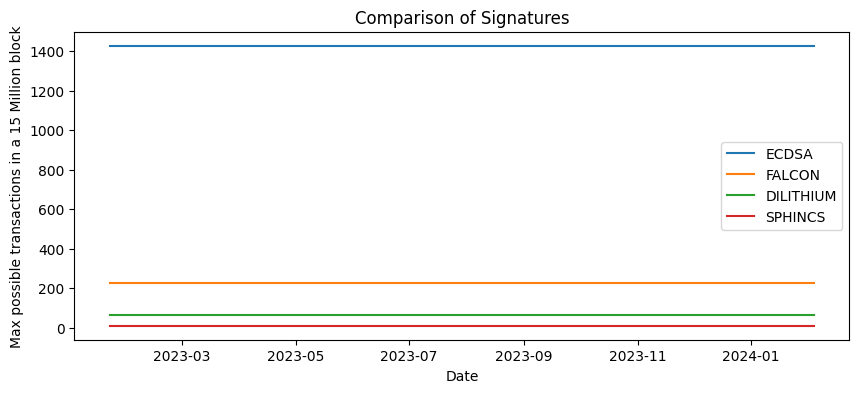

In [11]:
ECDSA_resampled = ECDSA.resample('1d', on='Date').mean()
FALCON_resampled = FALCON.resample('1d', on='Date').mean()
DILITHIUM_resampled = DILITHIUM.resample('1d', on='Date').mean()
SPHINCS_resampled = SPHINCS.resample('1d', on='Date').mean()

plt.figure(figsize=(10, 4))
plt.plot(ECDSA_resampled['NoMaxTxPossible'], label='ECDSA')
plt.plot(FALCON_resampled['NoMaxTxPossible'], label='FALCON')
plt.plot(DILITHIUM_resampled['NoMaxTxPossible'], label='DILITHIUM')
plt.plot(SPHINCS_resampled['NoMaxTxPossible'], label='SPHINCS')

plt.xlabel('Date')
plt.ylabel('Max possible transactions in a 15 Million block')
plt.title('Comparison of Signatures')
plt.legend()
plt.show()

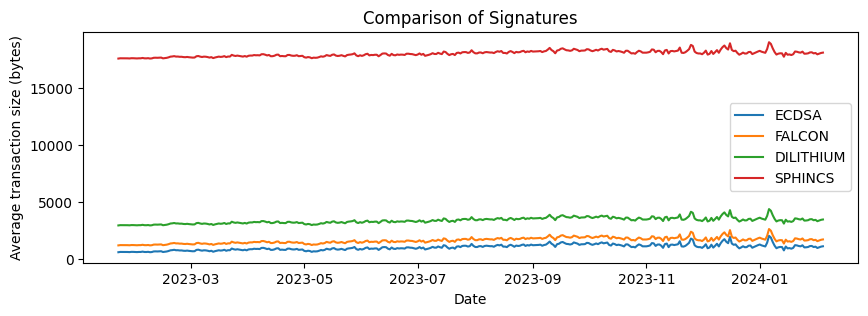

In [12]:
plt.figure(figsize=(10, 3))

plt.plot(ECDSA_resampled['AvgTxSize'], label='ECDSA')
plt.plot(FALCON_resampled['AvgTxSize'], label='FALCON')
plt.plot(DILITHIUM_resampled['AvgTxSize'], label='DILITHIUM')
plt.plot(SPHINCS_resampled['AvgTxSize'], label='SPHINCS')

plt.xlabel('Date')
plt.ylabel('Average transaction size (bytes)')
plt.title('Comparison of Signatures')
plt.legend()
plt.show()

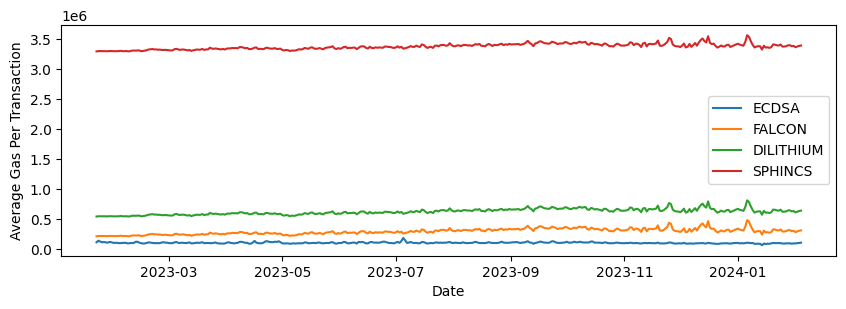

In [17]:
plt.figure(figsize=(10, 3))

plt.plot(ECDSA_resampled['AvgTxGas'], label='ECDSA')
plt.plot(FALCON_resampled['AvgTxGas'], label='FALCON')
plt.plot(DILITHIUM_resampled['AvgTxGas'], label='DILITHIUM')
plt.plot(SPHINCS_resampled['AvgTxGas'], label='SPHINCS')

plt.xlabel('Date')
plt.ylabel('Average Gas Per Transaction')
# plt.title('Comparison of Signatures')
plt.legend()
plt.show()

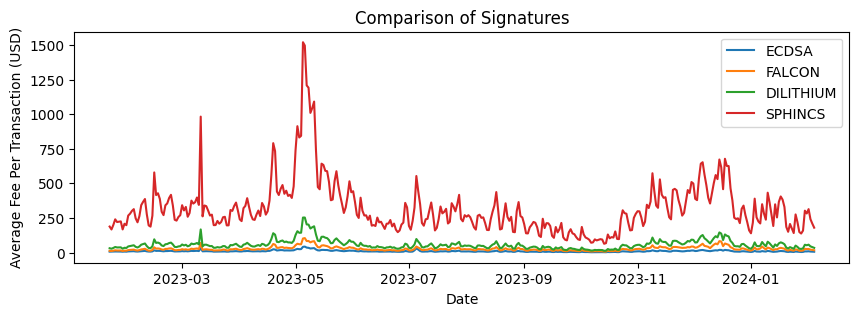

In [14]:
plt.figure(figsize=(10, 3))

plt.plot(ECDSA_resampled['AvgFeePerTx'] * 3384.55, label='ECDSA')
plt.plot(FALCON_resampled['AvgFeePerTx'] * 3384.55, label='FALCON')
plt.plot(DILITHIUM_resampled['AvgFeePerTx'] * 3384.55, label='DILITHIUM')
plt.plot(SPHINCS_resampled['AvgFeePerTx'] * 3384.55, label='SPHINCS')

plt.xlabel('Date')
plt.ylabel('Average Fee Per Transaction (USD)')
plt.title('Comparison of Signatures')
plt.legend()
plt.show()

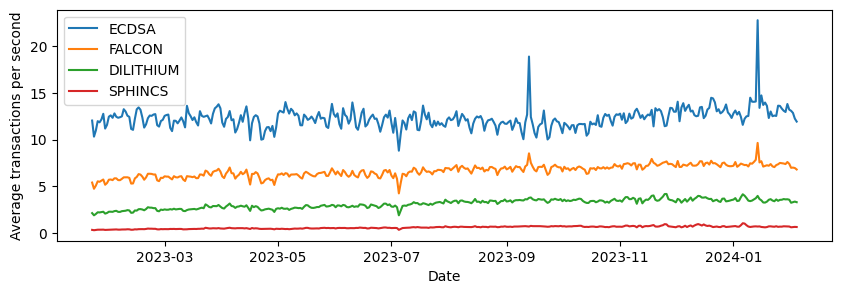

In [15]:
plt.figure(figsize=(10, 3))

plt.plot(ECDSA_resampled['AverageTPS'], label='ECDSA')
plt.plot(FALCON_resampled['AverageTPS'], label='FALCON')
plt.plot(DILITHIUM_resampled['AverageTPS'], label='DILITHIUM')
plt.plot(SPHINCS_resampled['AverageTPS'], label='SPHINCS')

plt.xlabel('Date')
plt.ylabel('Average transactions per second')
# plt.title('Comparison of Signatures')
plt.legend()
plt.show()

In [16]:
SPHINCS.describe()

,AvgTxSize,Date,AvgTxGas,AvgFeePerTx,Power,NoMaxTxPossible,AverageTPS
count,2.693665e+06,2693665,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06,2.693665e+06
mean,1.801124e+04,2023-07-30 05:13:25.797916672,3.367940e+06,9.387072e-02,9.900657e+02,9.362863e+00,6.218504e-01
min,1.713530e+04,2023-01-21 11:46:35,3.204148e+06,1.328309e-02,9.900657e+02,9.362863e+00,2.504436e-03
25%,1.745684e+04,2023-04-26 11:54:23,3.264273e+06,5.023926e-02,9.900657e+02,9.362863e+00,2.951087e-01
50%,1.770928e+04,2023-07-30 11:04:47,3.311476e+06,7.459942e-02,9.900657e+02,9.362863e+00,4.777191e-01
75%,1.827213e+04,2023-11-01 23:16:47,3.416724e+06,1.140082e-01,9.900657e+02,9.362863e+00,8.051803e-01
max,8.241100e+04,2024-02-04 15:06:23,1.541012e+07,2.676506e+00,9.900657e+02,9.362863e+00,6.836006e+00
std,9.273483e+02,NaN,1.734058e+05,7.403776e-02,1.023182e-12,4.618529e-14,4.710287e-01
